### SMS Spam Detection 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.utils import resample
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

In [2]:
sms_df = pd.read_csv("E:\\Jyoti new data\\codsoft tasks\\task_4\\spam.csv", encoding = 'latin-1')

In [3]:
sms_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
sms_df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1, inplace = True)

In [5]:
sms_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
sms_df.shape

(5572, 2)

In [7]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
sms_df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
sms_df.isnull().sum()

v1    0
v2    0
dtype: int64

In [10]:
sms_df.columns

Index(['v1', 'v2'], dtype='object')

In [11]:
sms_df.rename(columns = {'v1':"Result",'v2' :"Msg"},inplace =True)

In [12]:
sms_df

,Result,Msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


E:\Python setup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Python setup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Python setup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


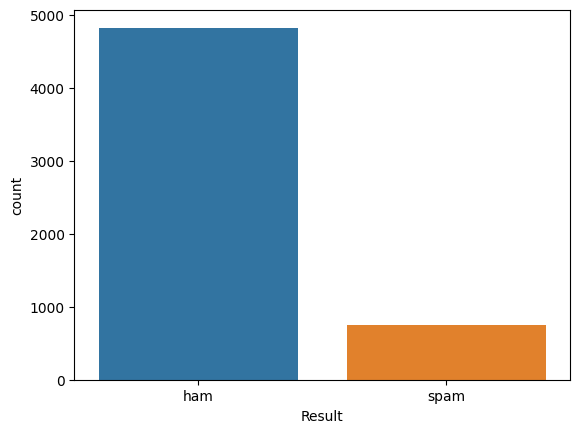

In [13]:
sns.countplot(sms_df, x = 'Result')
plt.show()

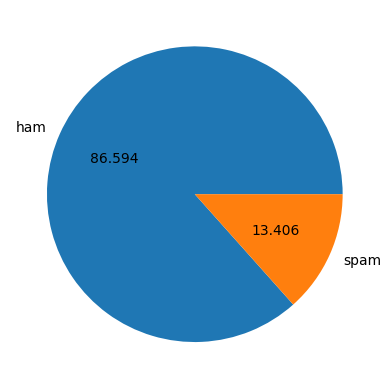

In [14]:
plt.pie(sms_df['Result'].value_counts(), labels = ['ham','spam'] , autopct = '%0.3f')
plt.show()

In [15]:
sms_df.loc[sms_df['Result']=="spam" , 'Result'] = 0
sms_df.loc[sms_df['Result']=="ham" , 'Result'] = 1
sms_df

,Result,Msg
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [16]:
#plt.scatter(sms_df['Msg'],sms_df['Result'])

In [17]:
features = sms_df['Msg']
Target = sms_df['Result']

In [18]:
features.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Msg, dtype: object

In [19]:
Target.head()

0    1
1    1
2    0
3    1
4    1
Name: Result, dtype: object

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(features,Target,test_size = 0.2, random_state = 5)


In [21]:
print("Training data size : ",X_train.shape,Y_train.shape)
print("Testing data size : ",X_test.shape,Y_test.shape)

Training data size :  (4457,) (4457,)
Testing data size :  (1115,) (1115,)


In [22]:
X_train.head()

1658    RGENT! This is the 2nd attempt to contact U!U ...
1509    When u love someone Dont make them to love u a...
3266                    Ok then i come n pick u at engin?
5199           Ugh my leg hurts. Musta overdid it on mon.
3217      Don know:)this week i'm going to tirunelvai da.
Name: Msg, dtype: object

In [23]:
Y_train.head()

1658    0
1509    1
3266    1
5199    1
3217    1
Name: Result, dtype: object

In [24]:
X_test.head()

2095                      Probably, want to pick up more?
5343    No go. No openings for that room 'til after th...
564     Fuck babe ... I miss you already, you know ? C...
3849    I to am looking forward to all the sex cuddlin...
3317                    I'm freezing and craving ice. Fml
Name: Msg, dtype: object

In [25]:
Y_test.head()

2095    1
5343    1
564     1
3849    1
3317    1
Name: Result, dtype: object

In [26]:
tfidf_vectorizer = TfidfVectorizer(min_df =1, stop_words = 'english' ,lowercase = True)

In [27]:
Xtrain = tfidf_vectorizer.fit_transform(X_train)
Xtest = tfidf_vectorizer.transform(X_test)

In [28]:
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [29]:
print(Xtrain.shape)

(4457, 7562)


In [30]:
print(Xtrain)
type(Xtrain)

  (0, 547)	0.19152841010524888
  (0, 4294)	0.28644338819823545
  (0, 4441)	0.3004300201964308
  (0, 323)	0.20701507316885265
  (0, 1582)	0.3004300201964308
  (0, 2060)	0.28644338819823545
  (0, 17)	0.3004300201964308
  (0, 1170)	0.235861682013409
  (0, 255)	0.3004300201964308
  (0, 299)	0.3004300201964308
  (0, 7385)	0.17495047100609937
  (0, 1950)	0.18804107135562415
  (0, 1121)	0.22100170516704798
  (0, 419)	0.21064951354406
  (0, 5654)	0.3004300201964308
  (1, 4677)	0.39845583282426406
  (1, 3193)	0.2591671916327502
  (1, 4124)	0.3296434324793044
  (1, 7208)	0.19855109683473132
  (1, 4221)	0.23143613226832413
  (1, 2368)	0.4417441422204556
  (1, 4123)	0.6142291225048643
  (2, 2542)	0.725064435052481
  (2, 5067)	0.46348688962377765
  (2, 1877)	0.3715292831116183
  :	:
  (4454, 2748)	0.2300309211785976
  (4454, 776)	0.19922677591108967
  (4454, 3414)	0.22227798914184893
  (4454, 3983)	0.16274117830861917
  (4454, 4482)	0.1632428077377904
  (4454, 7269)	0.1907605281605737
  (4454, 5987

scipy.sparse._csr.csr_matrix

In [31]:
print(Xtest.shape)

(1115, 7562)


In [32]:
print(Xtest)
type(Xtest)

  (0, 7208)	0.4739172738497195
  (0, 5301)	0.6628777169079424
  (0, 5067)	0.5796512313225634
  (1, 6745)	0.5114872515059872
  (1, 6664)	0.7006522604998099
  (1, 5698)	0.4974607536312363
  (2, 7208)	0.24056242663175542
  (2, 5885)	0.23986517325574042
  (2, 4635)	0.3641390879887715
  (2, 4617)	0.2522342239262377
  (2, 4465)	0.3101799135578888
  (2, 4408)	0.29707666788221065
  (2, 3983)	0.29241586396838354
  (2, 3859)	0.22777397235252636
  (2, 2958)	0.35797374953989375
  (2, 2031)	0.3935522961497522
  (2, 1179)	0.2889503035303371
  (3, 5918)	0.46760475295840265
  (3, 4095)	0.4155235605620056
  (3, 2898)	0.5202399501040514
  (3, 2073)	0.5814089438117707
  (4, 3500)	0.5357422286596162
  (4, 2926)	0.607498427942198
  (4, 2854)	0.5864519796868161
  (5, 7039)	0.14451011341273184
  :	:
  (1108, 251)	0.28195219768458046
  (1109, 7402)	0.4378323890725011
  (1109, 6113)	0.6267988620283499
  (1109, 3435)	0.5086527176714886
  (1109, 3098)	0.3958514853381766
  (1110, 6697)	0.4807389917597762
  (1110,

scipy.sparse._csr.csr_matrix

In [33]:
logmodel = LogisticRegression()

In [34]:
logmodel.fit(Xtrain,Y_train)

LogisticRegression()

In [35]:
predictions_train = logmodel.predict(Xtrain)
accuracy_train = accuracy_score(Y_train,predictions_train)
print("Accuracy on training data = ",accuracy_train)

Accuracy on training data =  0.9685887368184878


In [36]:
predictions_test = logmodel.predict(Xtest)
accuracy_test = accuracy_score(Y_test,predictions_test)
print("Accuracy on testing data = ",accuracy_test)

Accuracy on testing data =  0.9659192825112107


In [37]:
new_test_mail = ["Hello! How are you?"]
new_msg = tfidf_vectorizer.transform(new_test_mail)
new_msg

<1x7562 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [38]:
predicted_output = logmodel.predict(new_msg)
if(predicted_output):
    print("Ham email")
else:
    print("Spam email")

Ham email


In [39]:
new_test_mail = ["Thanks for subscription"]
new_msg = tfidf_vectorizer.transform(new_test_mail)
new_msg

<1x7562 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [40]:
predicted_output = logmodel.predict(new_msg)
if(predicted_output):
    print("Ham email")
else:
    print("Spam email")

Ham email


In [41]:
conf_matrix = confusion_matrix(Y_test,predictions_test)
conf_matrix

array([[100,  37],
       [  1, 977]], dtype=int64)

In [42]:
svm = SVC()

In [43]:
svm.fit(Xtrain,Y_train)

SVC()

In [44]:
svm_predict_train = svm.predict(Xtrain)

In [45]:
svm_predict_test = svm.predict(Xtest)

In [46]:
accuracy_train = accuracy_score(Y_train,svm_predict_train)
print("Accuracy on training data using svm = ",accuracy_train)

Accuracy on training data using svm =  0.9984294368409243


In [47]:
accuracy_test = accuracy_score(Y_test,svm_predict_test)
print("Accuracy on testing data using svm = ",accuracy_test)

Accuracy on testing data using svm =  0.9820627802690582


In [48]:
precision_score(Y_test,svm_predict_test)

0.9799599198396793

In [49]:
recall_score(Y_test,svm_predict_test)

1.0

In [50]:
f1_score(Y_test,svm_predict_test)

0.9898785425101214